<a href="https://colab.research.google.com/github/Parbjot/comp215/blob/main/labs/lab04-more_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMP 215 - LAB 4
----------------
#### Name(s): Parbjot Singh
#### Date: 29th January 2025

By the end of this lab you should be able to:
  * use composition and inheritance in a `class` to categorize related information


During this lab, you will be introduced to the following:
  * something, something



## Near Earth Objects (with more classes)

We'll continue working with Near Earth Object data using NASA's API: https://api.nasa.gov/.  In Lab 3 we defined an Asteroid class that contained a simple data structure.  In this lab, we will be Here's a brief review from Lab 2 on how to use the API.  

In [1]:
# import necessary modules
import datetime, json, requests
from pprint import pprint

### Review: make an API query

Here's a query that gets the record for a single NEO that recently passed by.

In [2]:
#API_KEY = 'DEMO_KEY'  # substitute your API key here
API_KEY = 'QMU73gySBTeUk6FVRje8eMwNOFfI1FZOwRtlf0Xo'

def get_neos(start_date):
    """ Return a list of NEO for the week starting at start_date """
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&api_key={API_KEY}'
    # Fetch last week's NEO feed
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    #pprint(data)
    print(f'{data["element_count"]} Near Earth Objects found for week of {start_date}')
    return [neo for dated_records in data['near_earth_objects'].values() for neo in dated_records ]

def get_neo(id):
    """ Return a NEO record for the given id """
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    return json.loads(response.text)

week_start = '2023-01-15'
neos = get_neos(week_start)
assert len(neos) > 0, f'Oh oh!  No NEOs found for {week_start}'
neo = get_neo(neos[-1]['id'])  # get the very latest NEO
print(f"Record for NEO ID {neos[-1]['id']} is:")
pprint(neo)

117 Near Earth Objects found for week of 2023-01-15
Record for NEO ID 54339874 is:
{'absolute_magnitude_h': 24.86,
 'close_approach_data': [{'close_approach_date': '1949-07-04',
                          'close_approach_date_full': '1949-Jul-04 22:19',
                          'epoch_date_close_approach': -646710060000,
                          'miss_distance': {'astronomical': '0.419726307',
                                            'kilometers': '62790161.51016609',
                                            'lunar': '163.273533423',
                                            'miles': '39015997.166588442'},
                          'orbiting_body': 'Earth',
                          'relative_velocity': {'kilometers_per_hour': '73509.6739172087',
                                                'kilometers_per_second': '20.4193538659',
                                                'miles_per_hour': '45676.0526626122'}},
                         {'close_approach_date': '1950-0

## Exercise 1: Define a CloseApproach class

Each NEO record comes with a list of `close_approach_data`, where each record in this list represents a single “close approach” to another orbiting body.
1. Develop a class named `CloseApproach` to represent a single close approach record.  State variables are

        neo (refrence to related NEO object)
        orbiting body (str)
        approach date (datetime object!)
        miss distance (float - choose units, document it, and be consistent!)
        relative velocity (ditto)
  
2. Define a "Factory" class method to construct a `CloseApproach` object from one close approach data record (a dictionary object). This method takes a `neo` object as input for the NEO to which the close approach data belongs. Remember to parse the date/time string into a datetime object.

In [5]:
# Ex. 1 your code here
class CloseApproach:
  def __init__(self, neo, orbiting_body, approach_date, miss_distance, relative_velocity):
    self.neo = neo
    self.orbiting_body = orbiting_body
    self.approach_date = approach_date
    self.miss_distance = miss_distance
    self.relative_velocity = relative_velocity
  def __str__(self):
    return str((self.neo, self.orbiting_body, self.approach_date, self.miss_distance, self.relative_velocity))
  @classmethod
  def from_json(cls, neo, index_data):
    data = neo['close_approach_data'][index_data]
    approach_date = data['close_approach_date']
    miss_distance = data['miss_distance']['kilometers']
    orbiting_body = data['orbiting_body']
    relative_velocity = data['relative_velocity']['kilometers_per_second']
    neo_id = neo['id']
    return cls(neo_id, orbiting_body, approach_date, miss_distance, relative_velocity)

a= CloseApproach.from_json(neo, 2)
print(a)


('54339874', 'Earth', '1951-01-22', '27113758.925833802', '10.9888695377')


## Exercise 2: Add list of CloseApproach objects to the Asteroid

Define an `Asteroid` class, like you did in Lab 3, but give the `Asteroid` list of “close approaches”.  This is called *composition* because each Asteroid object will be *composed* of CloseApproach objects (plus some other things).  There is bit of a catch-22 here because we need the `Asteroid` to construct the `CloseApproach` objects. The first two steps deal with that:

1. Add an instance variable to your Asteroid class with a default value of an empty list:

    ```
    close_approaches:list = []
    ```
      
2. In the Asteroid `from_NEO` factory, use a list comprehension to build the list of `CloseApproach` objects for the Asteroid instance, and then set the instance's `close_approaches` variable before returning it. Setting the value of an object's instance variables from outside the class is generally frowned upon - this is why we make the factory a method of the class itself.

3. Add a method to `Asteroid` to return the `CloseApproach` object for the nearest miss (ie. smallest `missed_distance`):
    ```
    def nearest_miss(self):
        ...
    ```

4. Add a method to the Asteroid class, `closest_earth_approach`, that returns the CloseApproach object that represents the closest approach the Asteroid makes to Earth.
    ```
    def closest_earth_approach(self):
        ...
    ```

Write some test code to demonstrate these new features.

In [12]:
# Ex. 2 your code here
class CloseApproach:
  def __init__(self, neo, orbiting_body, approach_date, miss_distance, relative_velocity):
    self.orbiting_body = orbiting_body
    self.approach_date = approach_date
    self.miss_distance = miss_distance
    self.relative_velocity = relative_velocity
    self.neo = neo
  def __str__(self):
    return f"CloseApproach to {self.orbiting_body} at {self.approach_date} with a miss distance of {self.miss_distance} and a relative velocity of {self.relative_velocity}."
class Asteroid:
  def __init__(self, id, name, diameter, hazardous, close_approaches=[]):
    self.id = id
    self.name = name
    self.diameter = diameter
    self.hazardous = hazardous
    self.close_approaches = close_approaches
  @classmethod
  def from_NEO(cls, neo):
    asteroid = cls( neo['id'], neo['name'], neo['diameter'], neo['hazardous'])
    asteroid.close_approaches = [CloseApproach(
            data['orbiting_body'],
            data['close_approach_date'],
            data['miss_distance']['kilometers'],
            data['relative_velocity']['kilometers_per_second']
        ) for data in neo.get('close_approach_data', [])]
    return asteroid
  def nearest_miss(self):
    if not self.close_approaches:
      return None
    return min(self.close_approaches, key=lambda approach: approach.miss_distance)
  def __str__(self):
    return f"Name of the asteriod is {self.name}, id is {self.id}, diameter is {self.diameter}, hazardous is {self.hazardous}."
  def closest_earth_approach(self):
    if not self.close_approaches:
      return None
    return min(self.close_approaches, key=lambda approach: approach.miss_distance)
neo= {'id':'12345', 'name':'Example', 'diameter':100, 'hazardous':True, 'close_approach':[{
            'orbiting_body': 'Earth',
            'close_approach_date': '2024-01-30',
            'miss_distance': {'kilometers': 5000},
            'relative_velocity': {'kilometers_per_second': 10}
        },]}
asteroid = Asteroid.from_NEO(neo)
print(asteroid)
nearest = asteroid.nearest_miss()
if nearest:
  print(f"Nearest miss: {nearest}")
else:
  print("No close approaches found for this asteroid.")


Name of the asteriod is Example, id is 12345, diameter is 100, hazardous is True.
No close approaches found for this asteroid.


## Exercise 3: Plot the Closest Approaches

Write a function that takes an Asteroid object as a parameter and makes a timeline plot of close approaches.  You may wish to use the `matplotlib.pyplot` `plot` object.  Here is an example of a timeline plot for the asteroid with neo id '54339874'

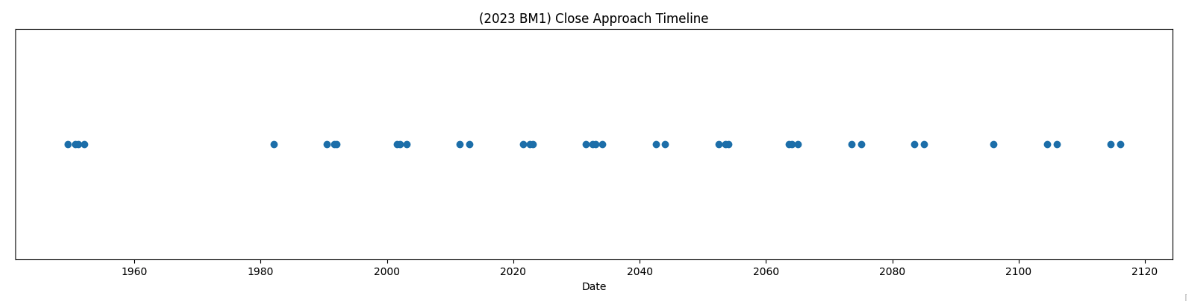

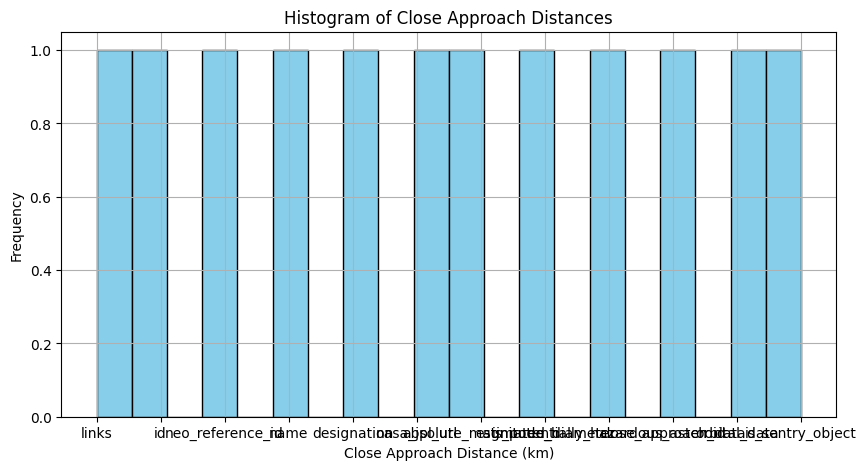

In [34]:
# Ex. 3 your code here
import matplotlib.pyplot as plt
def plot_close_approach_histogram(close_approach_data):

  plt.figure(figsize=(10, 5))
  plt.hist(close_approach_data, bins=20, color='skyblue', edgecolor='black')
  plt.xlabel('Close Approach Distance (km)')
  plt.ylabel('Frequency')
  plt.title('Histogram of Close Approach Distances')
  plt.grid(True)
  plt.show()
neo = get_neo(54339874)
plot_close_approach_histogram(neo)

## Challenge - Take your skills to the next level...

 With these data structures in place, we can now start answering all kinds of interesting questions about a single Asteroid or a set of Asteroids.  
Here’s a couple ideas to try:



* write a **function** named `most_dangerous_approach`, that takes a date range and returns a single “potentially hazardous” Asteroid object that makes the closest approach to Earth in within that range.  Your algorithm will ultimately need to:
    * grab the list of NEO’s for the given date range;
    * use a list comprehension to build the list of Asteroid objects for the NEO’s returned
    * use a list comprehension to filter  potentially hazardous Asteroids only;
    * use a list comprehension to map each Asteroid to its  closest_earth_approach
    * apply Python’s min function to identify the Asteroid with the closest_earth_approach

You may want to decompose some of these steps into smaller functions.
* add a method to the Asteroid class, estimated_mass, that computes an estimate of the Asteroid’s mass based on its diameter.  This is a model – state your assumptions.
* add a method to the CloseApproach class, impact_force,  that estimates the force of impact if the Asteroid hit the orbiting object.  Again, this is a model, state your assumptions.

In [ ]:
# Ex. 5 (challenge) your code here